In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy import constants as const
from astropy import units as u

$$ \frac{1 K_{RJ}}{1MJy/sr} =  2 x 10^{20} \frac{k_b} {\lambda^{2}} $$
where: \
$K_{RJ}$ is the Rayleigh-Jeans temperature \
$k_b$ is the boltzman constant \
MJy/sr is Mega Janskys per steridian \
$\lambda$ is wavelength



In [3]:
#lets load two fits files for simulated data
simlocation = '/lustre/aoc/projects/hera/gtucker/repositories/plimpy/PolarizedImaging/sim_images/'
gsm = simlocation + 'zen.2457755.74025.uvCP.gsm.fits'
sim = simlocation + 'zen.2457755.74025.uvCP.uvh5.clean.with_modeln3000.image.fits'

Set MJD-OBS to 57755.240312 from DATE-OBS'. [astropy.wcs.wcs]
Set OBSGEO-B to   -30.721389 from OBSGEO-[XYZ].
Set OBSGEO-H to     1496.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -30.721389 from OBSGEO-[XYZ].
Set OBSGEO-H to     1496.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Text(0.5, 1.0, 'GSM of area within Simulated Data')

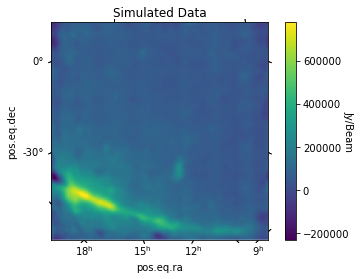

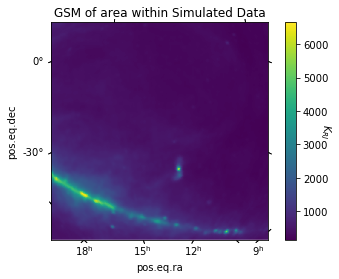

In [4]:
hdu = fits.open(sim)
simdata = hdu[0].data
wcs = WCS(hdu[0].header,naxis=2)
plt.subplot(projection=wcs)
plt.imshow(simdata[0][0])
cbar = plt.colorbar()
cbar.set_label('Jy/Beam',rotation=270)
plt.title('Simulated Data')

plt.figure()
hdu = fits.open(gsm)
gsmdata = hdu[0].data
wcs = WCS(hdu[0].header,naxis=2)
plt.subplot(projection=wcs)
plt.imshow(gsmdata)
cbar = plt.colorbar()
cbar.set_label('$K_{RJ}$',rotation=270)
plt.title('GSM of area within Simulated Data')

So the units of the simulated data is $Jy/Beam$ while the gsm is $K_{RJ}$... fun

In [5]:
#lets take a look at converting the gsm units first
k_b = const.k_B # J / K
c = const.c # m/s
freq = 150e6 * (1/u.s) #150 Mhz
lam = c / freq
print(lam)

1.9986163866666666 m


In [6]:
term2 = (2e20) *( k_b / lam**2)
term2

<Quantity 0.00069128 J / (K m2)>

In [27]:
#(1 K_rj / (1 u.MJy) / 1 * u.sr) = 2e10 * kb

In [28]:
gsmdata = (gsmdata / term2.value) #now this is in MJy/sr
hera_res = np.rad2deg(2 / 58.3) #in degrees, 58.3 from longest baseline
steradian_conversion = 2126.581141003892 #convert from degrees to steradian
steradian = hera_res / steradian_conversion #hera resolution in steradians

Text(0.5, 1.0, 'GSM in Jy/beam...I hope')

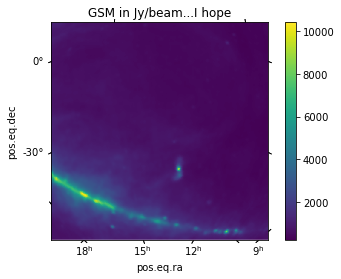

In [31]:
plt.subplot(projection=wcs)
plt.imshow(gsmdata /  (1e6 * steradian) )
cbar = plt.colorbar()
plt.title('GSM in Jy/beam...I hope')

Text(0.5, 1.0, 'GSM in Jy/beam...I hope')

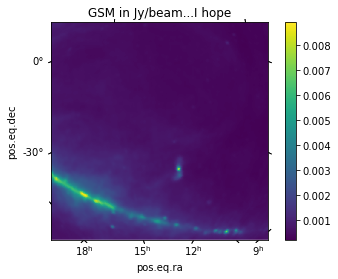

In [32]:
plt.subplot(projection=wcs)
plt.imshow((gsmdata * steradian ) / 1e6)
cbar = plt.colorbar()
plt.title('GSM in Jy/beam...I hope')